In [69]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
data_dir = '/content/drive/MyDrive/DataSet MLDL/Dataset MLDL Hewan'

In [71]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(227, 227), batch_size = 32)
print(data.class_names)
class_names = data.class_names

Found 300 files belonging to 3 classes.
['Aves', 'Mamalia', 'Reptil']


In [72]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator <tensorflow.python.data.ops.dataset_ops.NumpyIterator object at 0x7860104d7dc0>


In [73]:
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[1.11458153e+02, 1.21458153e+02, 6.84581528e+01],
         [1.08374451e+02, 1.19374451e+02, 6.21233482e+01],
         [1.08709251e+02, 1.18418503e+02, 5.92907486e+01],
         ...,
         [6.39448547e+01, 1.12328186e+02, 4.72004089e+01],
         [8.18105850e+01, 1.16930450e+02, 5.68088417e+01],
         [9.81982422e+01, 1.23345428e+02, 6.64490738e+01]],

        [[1.11017159e+02, 1.21538712e+02, 6.69740295e+01],
         [1.08374451e+02, 1.19374451e+02, 6.21233482e+01],
         [1.08026558e+02, 1.18015671e+02, 5.73656387e+01],
         ...,
         [5.94972534e+01, 1.08037445e+02, 4.02644119e+01],
         [7.37755508e+01, 1.10861237e+02, 4.74199066e+01],
         [9.02094955e+01, 1.17861115e+02, 5.77545052e+01]],

        [[1.10334030e+02, 1.21334030e+02, 6.40020752e+01],
         [1.09374451e+02, 1.20374451e+02, 6.11233482e+01],
         [1.08098595e+02, 1.18098595e+02, 5.56800919e+01],
         ...,
         [6.16116562e+01, 1.09581482e+02, 3.93551216e+01],
   

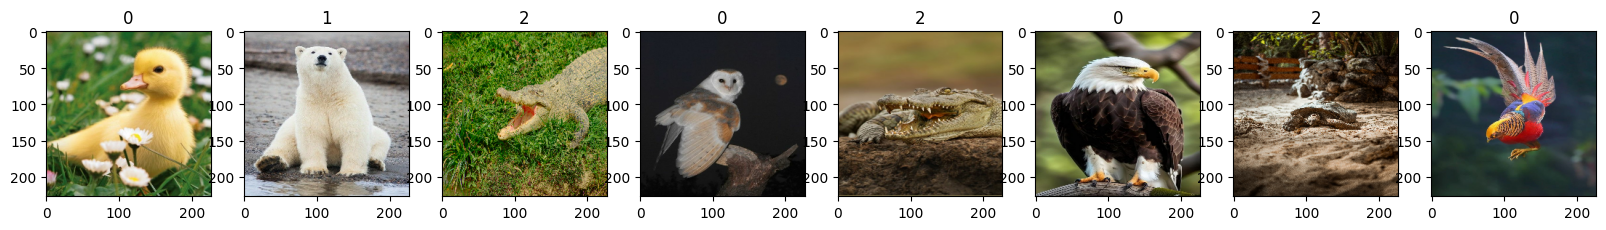

In [74]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [75]:
data = data.map(lambda x, y: (x/255.0, y))
print("Tipe data setelah normalisasi: {}".format(data.element_spec))
print("Bentuk data setelah normalisasi : {}".format(data.element_spec))
print("Jumlah data", len(data))

Tipe data setelah normalisasi: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Bentuk data setelah normalisasi : (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 10


In [77]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

8
1
1


In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

model = Sequential()

model.add(InputLayer(input_shape=(227, 227, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

In [79]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 227, 227, 64)      1792      
                                                                 
 conv2d_79 (Conv2D)          (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 113, 113, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 113, 113, 128)     73856     
                                                                 
 conv2d_81 (Conv2D)          (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train, epochs=100, validation_data=val, callbacks=[early_stopping])

Epoch 1/100
8/8 [==============================] - 115s 10s/step - loss: 1.1078 - accuracy: 0.3477 - val_loss: 1.0981 - val_accuracy: 0.3750
Epoch 2/100
8/8 [==============================] - 45s 3s/step - loss: 1.0985 - accuracy: 0.3398 - val_loss: 1.0969 - val_accuracy: 0.3750
Epoch 3/100
8/8 [==============================] - 45s 4s/step - loss: 1.0984 - accuracy: 0.3516 - val_loss: 1.0957 - val_accuracy: 0.3750
Epoch 4/100
8/8 [==============================] - 43s 3s/step - loss: 1.0976 - accuracy: 0.3359 - val_loss: 1.0963 - val_accuracy: 0.2500
Epoch 5/100
8/8 [==============================] - 64s 6s/step - loss: 1.0924 - accuracy: 0.3438 - val_loss: 1.0810 - val_accuracy: 0.3125
Epoch 6/100
8/8 [==============================] - 48s 4s/step - loss: 1.0955 - accuracy: 0.4297 - val_loss: 1.1004 - val_accuracy: 0.3750
Epoch 7/100
8/8 [==============================] - 47s 4s/step - loss: 1.0744 - accuracy: 0.4023 - val_loss: 1.0200 - val_accuracy: 0.4062
Epoch 8/100
8/8 [========

In [81]:
import pandas as pd

history_dict = history.history
df = pd.DataFrame(history_dict)
df['epoch'] = range(1, len(df) + 1)

file_path = r'C:\Universe\PMDPM\UAS\Dataset MLDL Hewan\History_VGG16_A_Selalu Bersama_VGG16.xlsx'

df.to_excel(file_path, index=False)

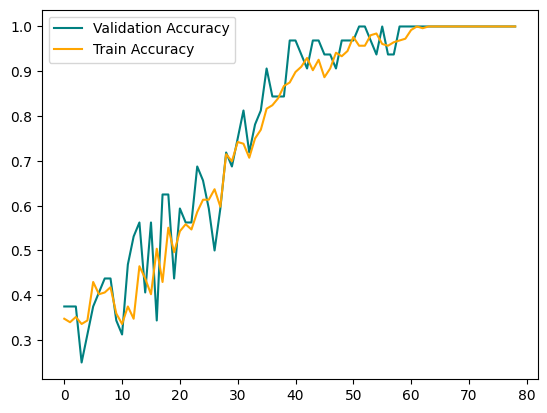

In [82]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label = 'Train Accuracy')
plt.legend(loc="upper left")
plt.show()

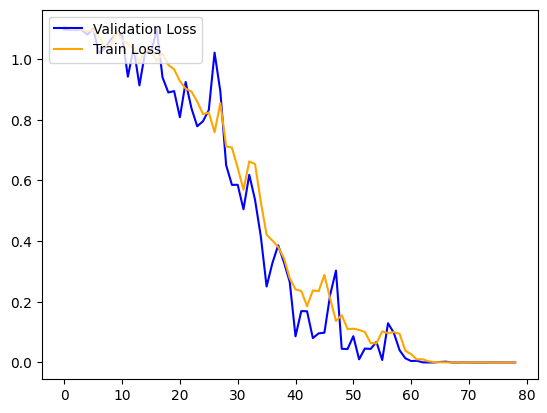

In [83]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label = 'Train Loss')
plt.legend(loc="upper left")
plt.show()

In [84]:
model.evaluate(test)

1/1 [==============================] - 23s 23s/step - loss: 2.6623e-06 - accuracy: 1.0000


[2.662301312739146e-06, 1.0]

In [85]:
model.save(r'/content/drive/MyDrive/DataSet MLDL/model_hewan_VGGNett.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model(r'/content/drive/MyDrive/DataSet MLDL/model_hewan_VGGNett.h5')

(1, 227, 227, 3)
1/1 [==============================] - 0s 236ms/step
[[2.9233433e-05 9.9997079e-01 2.1659139e-14]]
1
Accuracy :  99.997079372406
Mamalia


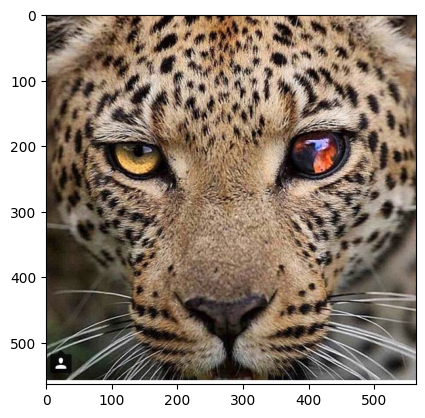

In [87]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/101.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 72ms/step
[[9.9992919e-01 7.0751106e-05 6.0743801e-09]]
0
Accuracy :  99.99291896820068
Aves


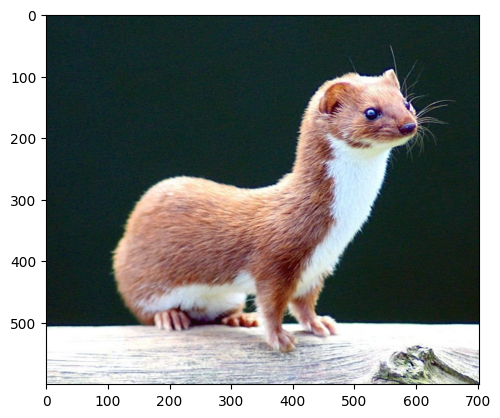

In [88]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/102.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 52ms/step
[[7.0940852e-01 1.9282817e-04 2.9039869e-01]]
0
Accuracy :  70.94085216522217
Aves


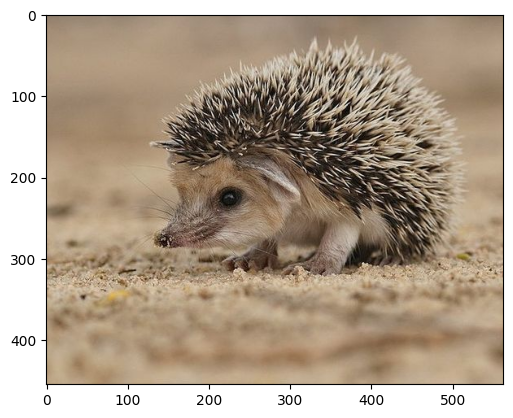

In [89]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/103.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 56ms/step
[[2.0466438e-04 9.9979454e-01 7.9922012e-07]]
1
Accuracy :  99.97945427894592
Mamalia


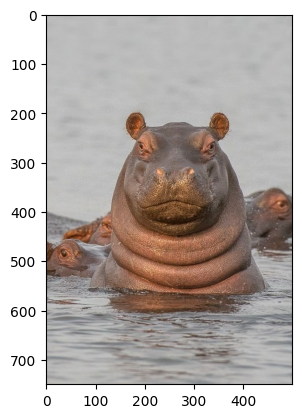

In [90]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/104.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 45ms/step
[[3.7477778e-07 9.9999964e-01 2.9842653e-10]]
1
Accuracy :  99.99996423721313
Mamalia


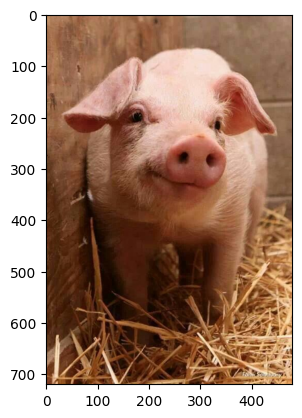

In [91]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/105.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 48ms/step
[[1.1150224e-09 1.0000000e+00 4.1760659e-10]]
1
Accuracy :  100.0
Mamalia


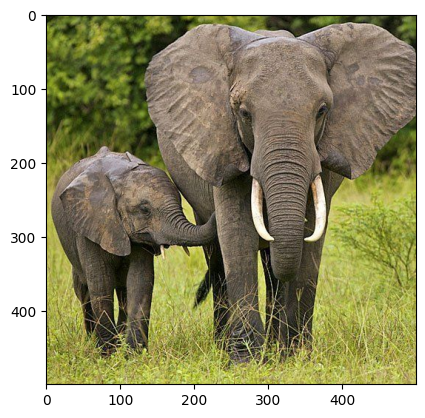

In [92]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/106.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 44ms/step
[[0.16458608 0.641172   0.19424196]]
1
Accuracy :  64.11719918251038
Mamalia


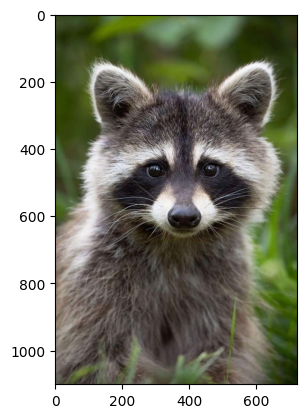

In [93]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/107.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 30ms/step
[[3.7673864e-05 9.9996233e-01 5.0201687e-10]]
1
Accuracy :  99.9962329864502
Mamalia


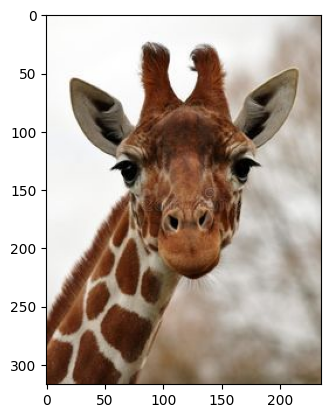

In [94]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/108.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 29ms/step
[[2.0718840e-01 7.9281163e-01 9.2397618e-09]]
1
Accuracy :  79.2811632156372
Mamalia


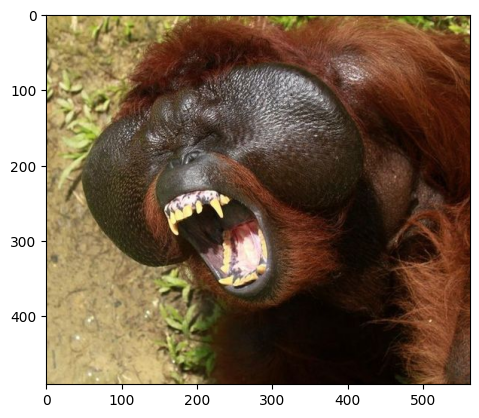

In [95]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/109.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 25ms/step
[[1.6481414e-01 8.3518410e-01 1.7429868e-06]]
1
Accuracy :  83.5184097290039
Mamalia


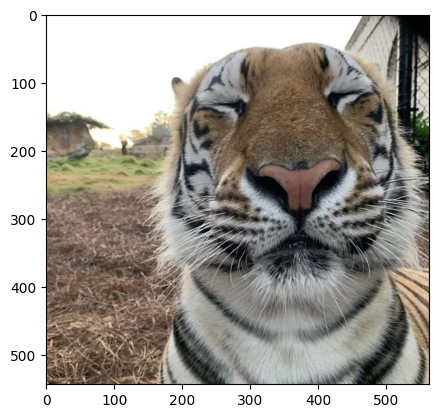

In [96]:
mamalia = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Mamalia/110.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (227, 227))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 28ms/step
[[4.9654172e-05 9.9995029e-01 8.8251437e-22]]
1
Accuracy :  99.99502897262573
Mamalia


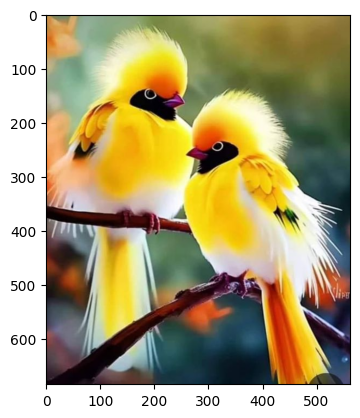

In [97]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/101.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 29ms/step
[[9.9999988e-01 1.3323585e-08 1.6350597e-07]]
0
Accuracy :  99.99998807907104
Aves


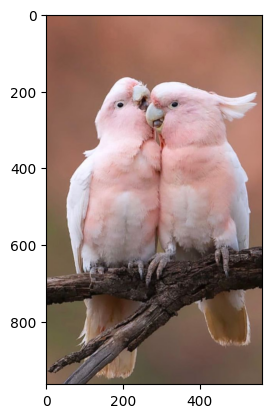

In [98]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/102.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 27ms/step
[[5.917269e-07 3.970621e-05 9.999597e-01]]
2
Accuracy :  99.99597072601318
Reptil


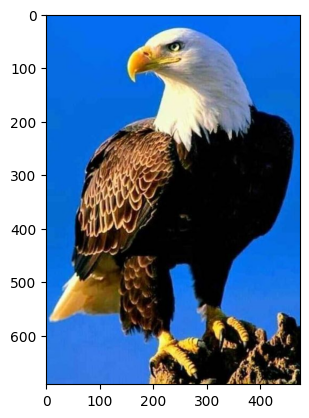

In [99]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/103.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 30ms/step
[[4.6601677e-01 5.3381079e-01 1.7247866e-04]]
1
Accuracy :  53.38107943534851
Mamalia


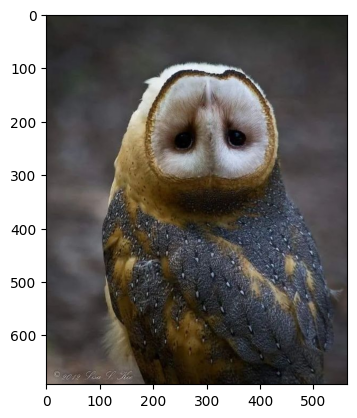

In [100]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/104.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 32ms/step
[[8.7293315e-01 1.2706651e-01 3.7182991e-07]]
0
Accuracy :  87.29331493377686
Aves


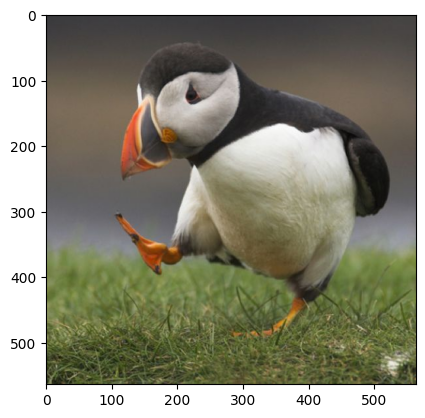

In [101]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/105.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 30ms/step
[[1.0000000e+00 3.9116837e-15 4.9574329e-36]]
0
Accuracy :  100.0
Aves


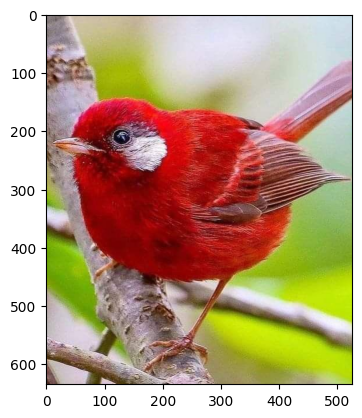

In [102]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/106.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 29ms/step
[[1.0000000e+00 1.6551237e-15 1.2332945e-17]]
0
Accuracy :  100.0
Aves


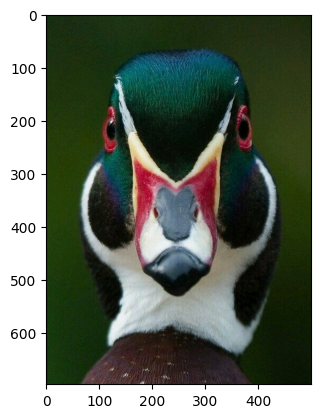

In [103]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/107.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 25ms/step
[[9.9999917e-01 8.6826003e-07 1.0626273e-30]]
0
Accuracy :  99.99991655349731
Aves


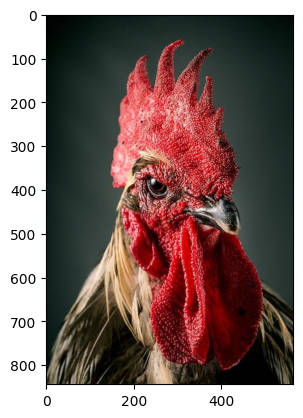

In [104]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/108.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 34ms/step
[[1.0000000e+00 1.1612435e-13 1.0560670e-12]]
0
Accuracy :  100.0
Aves


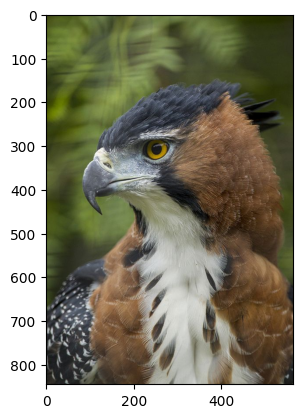

In [105]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/109.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 27ms/step
[[1.000000e+00 5.266965e-13 3.621336e-10]]
0
Accuracy :  100.0
Aves


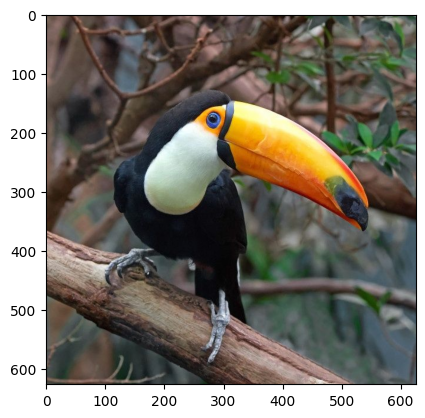

In [106]:
aves = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Aves/110.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (227, 227))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 31ms/step
[[6.5208152e-03 5.0538159e-23 9.9347913e-01]]
2
Accuracy :  99.34791326522827
Reptil


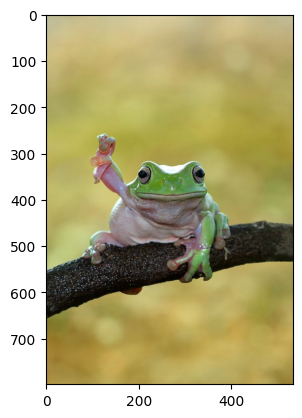

In [107]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/101.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 35ms/step
[[5.7349638e-08 9.9965060e-01 3.4942396e-04]]
1
Accuracy :  99.96505975723267
Mamalia


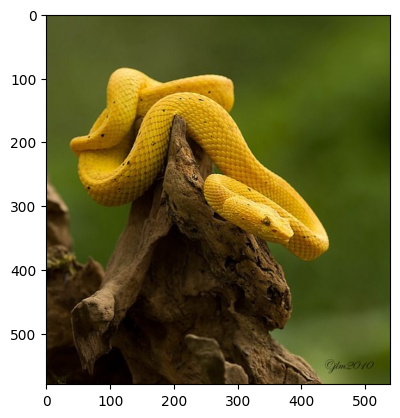

In [108]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/102.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 20ms/step
[[2.1809144e-13 1.1268280e-17 1.0000000e+00]]
2
Accuracy :  100.0
Reptil


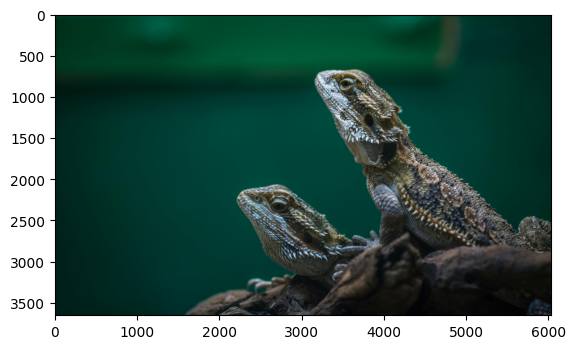

In [109]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/103.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 20ms/step
[[4.6268056e-10 9.5130064e-09 1.0000000e+00]]
2
Accuracy :  100.0
Reptil


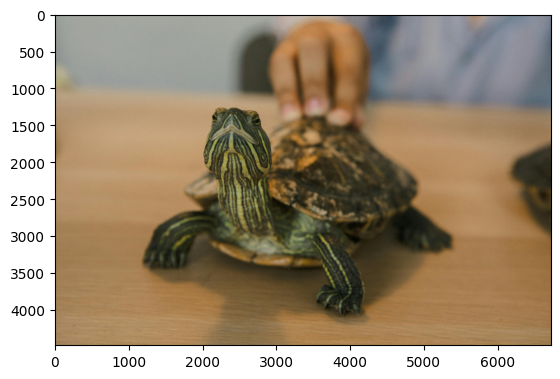

In [110]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/104.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 19ms/step
[[2.876361e-01 7.486724e-17 7.123639e-01]]
2
Accuracy :  71.23638987541199
Reptil


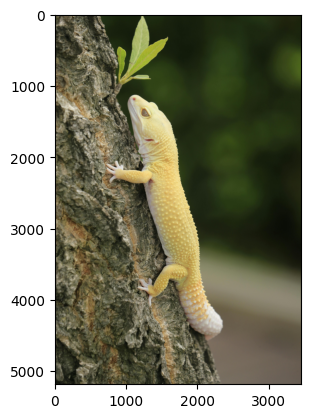

In [111]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/105.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 19ms/step
[[9.9999440e-01 3.1452592e-09 5.5944174e-06]]
0
Accuracy :  99.99943971633911
Aves


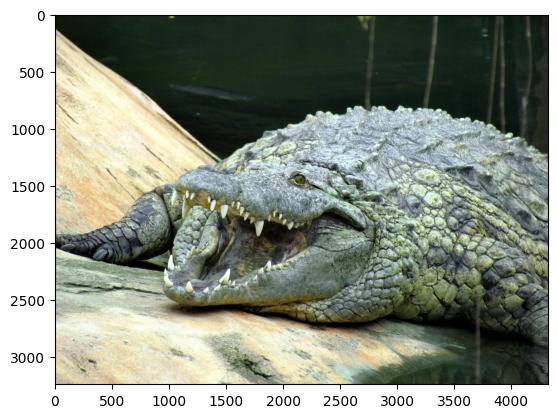

In [112]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/106.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 18ms/step
[[2.1094013e-06 2.9723717e-09 9.9999785e-01]]
2
Accuracy :  99.99978542327881
Reptil


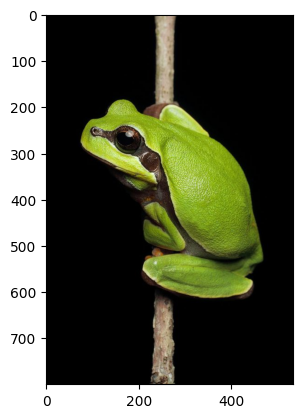

In [113]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/107.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 20ms/step
[[9.9984491e-01 2.1889879e-07 1.5485546e-04]]
0
Accuracy :  99.98449087142944
Aves


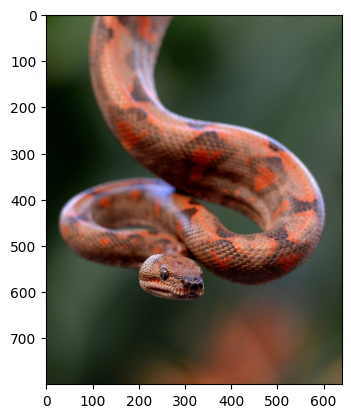

In [114]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/108.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 20ms/step
[[6.9530964e-13 2.5150100e-20 1.0000000e+00]]
2
Accuracy :  100.0
Reptil


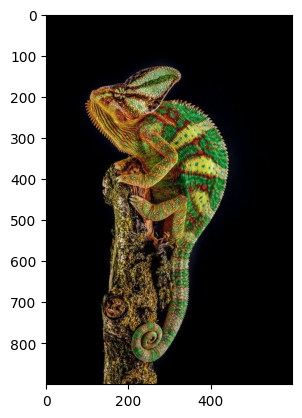

In [115]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/109.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 227, 227, 3)
1/1 [==============================] - 0s 28ms/step
[[1.947142e-05 2.865690e-06 9.999777e-01]]
2
Accuracy :  99.9977707862854
Reptil


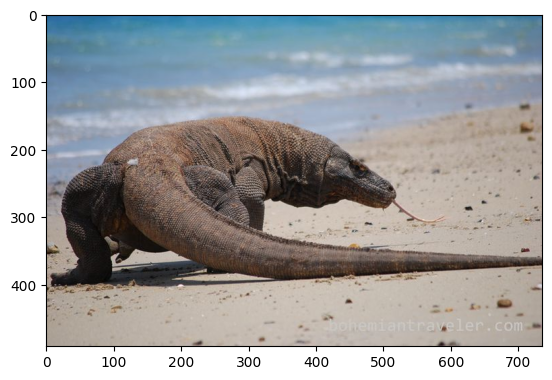

In [116]:
reptil = cv2.imread(r'/content/drive/MyDrive/DataSet MLDL/Test/Reptil/110.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (227, 227))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])